In [2]:
import sys 
sys.path.append('..')

In [3]:
from neural_networks.chessbot.chessbot import ChessBot
from neural_networks.chessbot.modelinput import ModelInput

In [47]:
import pickle

# and later you can load it
with open('models_move\\move_prediction_logreg_V1.pkl', 'rb') as f:
    logregmod = pickle.load(f)

In [53]:
%load_ext autoreload
%autoreload 2
from search_tree.MCTS import MCTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import keras
btf_single_input_model = keras.models.load_model('bin/btf/single_input_model/model')
btf_simple_input_model = keras.models.load_model('bin/btf/simple_input_model/model')
btf_triple_input_model = keras.models.load_model('bin/btf/triple_input_model/model')

owen_single_input_model = keras.models.load_model('bin/owen/single_input_model/model')
owen_simple_input_model = keras.models.load_model('bin/owen/simple_input_model/model')
owen_triple_input_model = keras.models.load_model('bin/owen/triple_input_model/model')

In [ ]:
logreg = 

In [6]:
import chess
import chess.svg
from IPython.display import SVG, display
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [8]:

def play_game(black, white, should_visualise=False):
	board = chess.Board()

	if should_visualise:
		display(board)

	while not board.is_game_over(claim_draw=True):
		board.push(black.move(board) if board.turn == chess.BLACK else white.move(board))

		if should_visualise:
			clear_output(wait=True)
			display(board)
			time.sleep(0.5)

	result = board.outcome(claim_draw=True).result()
	print(result)

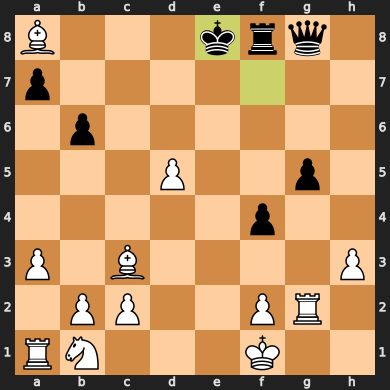

1/2-1/2


In [9]:
import chess
white = ChessBot(btf_simple_input_model, ModelInput('simple'), chess.WHITE, exploration_rate=0.0)
black = ChessBot(btf_triple_input_model, ModelInput('positions'), chess.BLACK, exploration_rate=0.0)
play_game(black, white, should_visualise=True)

In [38]:
board = chess.Board()
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K

output_owen_simple_input_model = owen_simple_input_model.predict(np.array([ModelInput('simple').get_input(board)]))



1/1 [==============================] - 0s 23ms/step


In [20]:
mcts = MCTS(max_time = 15, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=True)

In [7]:
from stockfish import Stockfish
import chess
import os

path = os.getcwd()+"\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe"
stockfish = Stockfish(path=path)
#stockfish.set_elo_rating(1150)
stockfish.set_elo_rating(800)

tf_simple_input_model w/... bad tree

vs

... stockfish

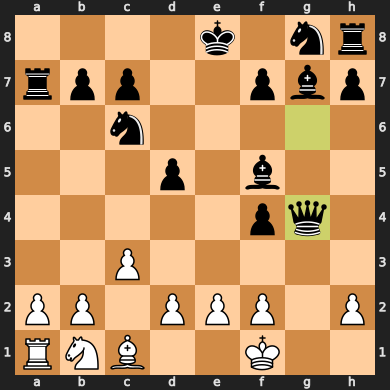

KeyboardInterrupt: 

In [10]:
mcts = MCTS(max_time = 30, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=False)
import chess
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    if board.turn:
        result = None
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        stockfish.set_fen_position(board.fen())
        stockfish_move = stockfish.get_best_move_time(1)
        board.push_uci(stockfish_move)


    clear_output(wait=True)
    display(board)
    time.sleep(3)

MCTS w/ heap

vs

model

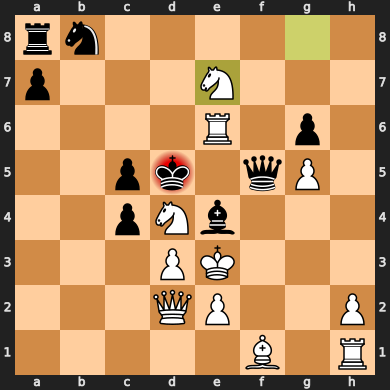

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [11]:
mctsmodel = MCTS(max_time = 20, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=False)
mcts = MCTS(max_time = 20, use_heap=True)
model = ChessBot(btf_simple_input_model, ModelInput('simple'), chess.WHITE, exploration_rate=0.0)
import chess
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    if board.turn:
        result = None
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        board.push(model.move(board))

    clear_output(wait=True)
    display(board)
    time.sleep(3)

In [13]:
mctsmodel = MCTS(max_time = 2, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=False)
mcts = MCTS(max_time = 2, use_heap=True)

import chess

for i in range(100):
    board.push(random.choice(list(board.legal_moves)))

board = chess.Board()
time_limit = 15
result = None
for i in range(50):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)

KeyboardInterrupt: 

btf_simple_input w/ heap

vs

mcts w/ heap

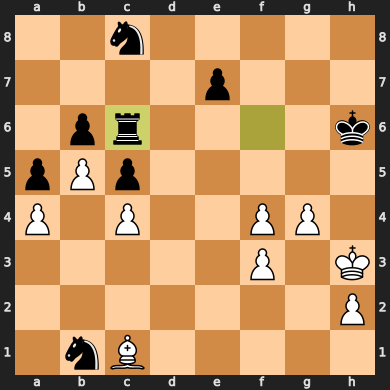

In [14]:
mctsmodel = MCTS(max_time = 2, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=True)
mcts = MCTS(max_time = 2, use_heap=True)

import chess

board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)

original logreg model I made early in the project... it's not great

vs 

... stockfish

In [54]:
# 
mcts = MCTS(max_time = 10, value_nn = btf_simple_input_model, model_input='simple', use_heap=True)
import chess
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(200):
    if board.turn:
        result = None
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        stockfish.set_fen_position(board.fen())
        stockfish_move = stockfish.get_best_move_time(1)
        board.push_uci(stockfish_move)


    clear_output(wait=True)
    display(board)
    time.sleep(3)

c:\Users\Sadie\Documents\GitHub\chessbot\search_tree\..\search_tree\MCTS.py:277: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def rollout_policy(self, move, board):


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).